<a href="https://colab.research.google.com/github/qamaralashrafi/Credit-Card-Fraud-Detection/blob/main/CPCS433_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

**Calling Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import roc_curve, auc
import os

**Downloading The Dataset From Kaggle**

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("goyaladi/fraud-detection-dataset")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3


**List all files in the directory**

In [ ]:
dataset_dir = "/root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data"
print(os.listdir(dataset_dir))
all_files_in_data = os.listdir(dataset_dir)
print("All files in the Data folder:", all_files_in_data)


['Transaction Data', 'Transaction Amounts', 'Customer Profiles', 'Merchant Information', 'Fraudulent Patterns']
All files in the Data folder: ['Transaction Data', 'Transaction Amounts', 'Customer Profiles', 'Merchant Information', 'Fraudulent Patterns']


**Printing Paths For each File**

In [ ]:
# Path to the 'Data' folder
dataset_dir = "/root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data"

# Subfolders inside the 'Data' directory
subfolders = ['Transaction Data', 'Customer Profiles', 'Transaction Amounts', 'Merchant Information', 'Fraudulent Patterns']
# Loop through each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)

    if os.path.isdir(subfolder_path):
        # List all CSV files in the subfolder
        csv_files = [file for file in os.listdir(subfolder_path) if file.endswith('.csv')]

        for csv_file in csv_files:
            file_path = os.path.join(subfolder_path, csv_file)
            print(f"Reading file: {file_path}")


Reading file: /root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Transaction Data/transaction_records.csv
Reading file: /root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Transaction Data/transaction_metadata.csv
Reading file: /root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Customer Profiles/customer_data.csv
Reading file: /root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Customer Profiles/account_activity.csv
Reading file: /root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Transaction Amounts/amount_data.csv
Reading file: /root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Transaction Amounts/anomaly_scores.csv
Reading file: /root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Merchant Information/transaction_category_labels.csv
Reading file: /root/.cache/kagglehub/datasets/goy

**Loading Each CSV File into varibles**

In [ ]:
account = pd.read_csv("/root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Customer Profiles/account_activity.csv")
customer = pd.read_csv("/root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Customer Profiles/customer_data.csv")
fraud = pd.read_csv("/root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Fraudulent Patterns/fraud_indicators.csv")
suspision = pd.read_csv("/root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Fraudulent Patterns/suspicious_activity.csv")
merchant = pd.read_csv("/root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Merchant Information/merchant_data.csv")
tran_cat = pd.read_csv("/root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Merchant Information/transaction_category_labels.csv")
amount = pd.read_csv("/root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Transaction Amounts/amount_data.csv")
anamoly = pd.read_csv("/root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Transaction Amounts/anomaly_scores.csv")
tran_data = pd.read_csv("/root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Transaction Data/transaction_metadata.csv")
tran_rec = pd.read_csv("/root/.cache/kagglehub/datasets/goyaladi/fraud-detection-dataset/versions/3/Data/Transaction Data/transaction_records.csv")


In [ ]:
data = [account,customer,fraud,suspision,merchant,tran_cat,amount,anamoly,tran_data,tran_rec]


In [ ]:
for df in data:
    print(df.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

**Merge All files**

In [ ]:
costumer_data = pd.merge(customer, account, on='CustomerID')
costumer_data = pd.merge(costumer_data, suspision, on='CustomerID')
costumer_data

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01,0
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02,0
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03,0
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05,0
...,...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22,0
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23,0
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24,0
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25,0


In [ ]:
transaction_data1 = pd.merge(fraud, tran_cat, on="TransactionID")
transaction_data2 = pd.merge(amount, anamoly, on="TransactionID")
transaction_data3 = pd.merge(tran_data, tran_rec, on="TransactionID")
transaction_data = pd.merge(transaction_data1, transaction_data2,on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_data3,on="TransactionID")
transaction_data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946
...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928


In [ ]:
data = pd.merge(transaction_data, costumer_data,on="CustomerID")
data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796,Customer 1796,33,Address 1796,5588.049942,2024-03-06,0
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946,Customer 1946,18,Address 1946,7324.785332,2024-08-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411,Customer 1411,19,Address 1411,1290.323059,2023-02-15,0
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566,Customer 1566,39,Address 1566,7067.831609,2023-07-20,0
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654,Customer 1654,51,Address 1654,9088.738359,2023-10-16,0
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928,Customer 1928,60,Address 1928,9352.655675,2024-07-16,0


In [ ]:
print(data.info())
print(data.shape)
print(data.describe())
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      1000 non-null   int64  
 1   FraudIndicator     1000 non-null   int64  
 2   Category           1000 non-null   object 
 3   TransactionAmount  1000 non-null   float64
 4   AnomalyScore       1000 non-null   float64
 5   Timestamp          1000 non-null   object 
 6   MerchantID         1000 non-null   int64  
 7   Amount             1000 non-null   float64
 8   CustomerID         1000 non-null   int64  
 9   Name               1000 non-null   object 
 10  Age                1000 non-null   int64  
 11  Address            1000 non-null   object 
 12  AccountBalance     1000 non-null   float64
 13  LastLogin          1000 non-null   object 
 14  SuspiciousFlag     1000 non-null   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 117.3+ KB
None
(1000, 15

**Preprocessing**

In [ ]:
print(data.isnull().sum())

TransactionID        0
FraudIndicator       0
Category             0
TransactionAmount    0
AnomalyScore         0
Timestamp            0
MerchantID           0
Amount               0
CustomerID           0
Name                 0
Age                  0
Address              0
AccountBalance       0
LastLogin            0
SuspiciousFlag       0
dtype: int64


**Check for Outliers**

Column: TransactionID - Outliers: 0 out of 1000 total entries
Column: FraudIndicator - Outliers: 45 out of 1000 total entries
Column: TransactionAmount - Outliers: 0 out of 1000 total entries
Column: AnomalyScore - Outliers: 0 out of 1000 total entries
Column: MerchantID - Outliers: 0 out of 1000 total entries
Column: Amount - Outliers: 0 out of 1000 total entries
Column: CustomerID - Outliers: 0 out of 1000 total entries
Column: Age - Outliers: 0 out of 1000 total entries
Column: AccountBalance - Outliers: 0 out of 1000 total entries
Column: SuspiciousFlag - Outliers: 25 out of 1000 total entries


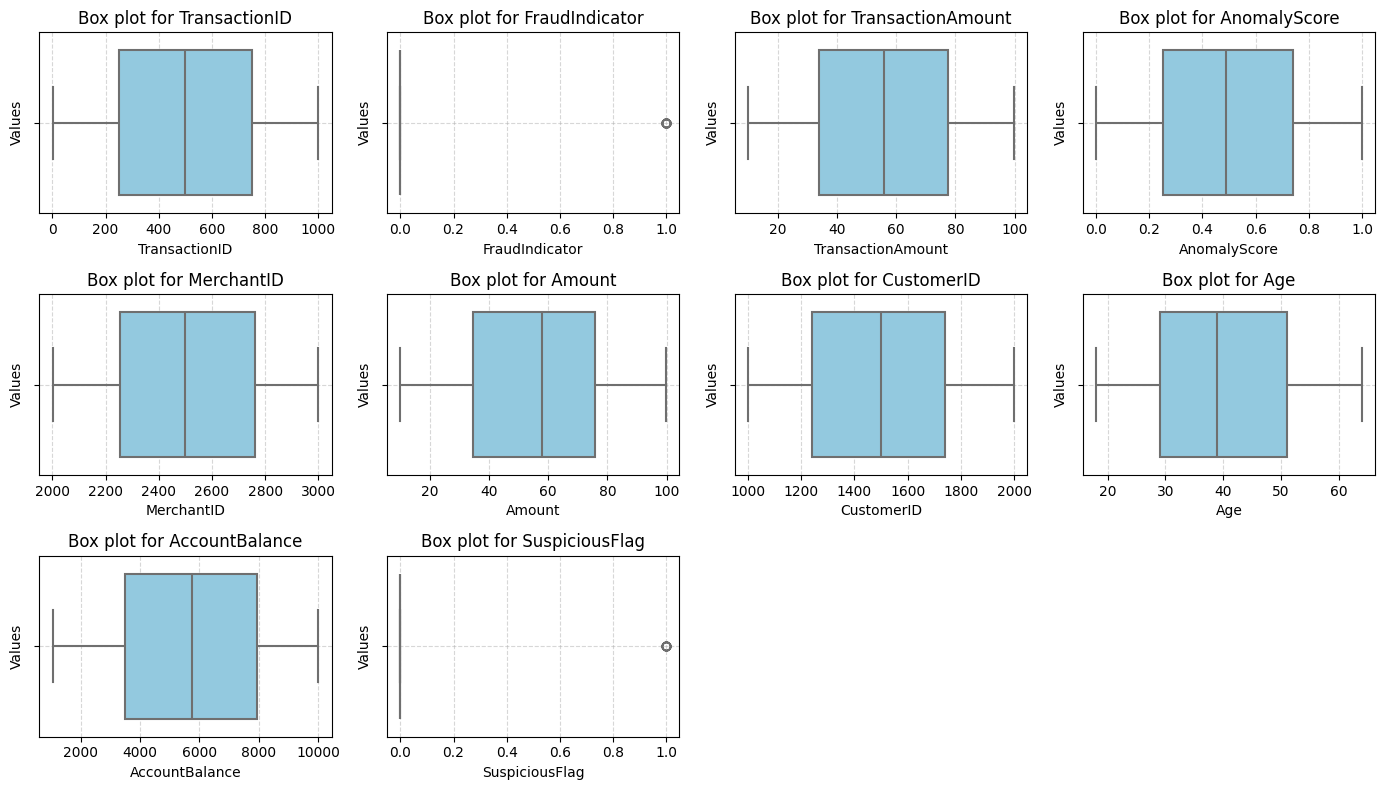

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Calculate the Z-scores for each numeric feature
z_scores = np.abs((numeric_data - numeric_data.mean()) / numeric_data.std())

# Set a threshold for determining outliers
threshold = 3  # Commonly used threshold; points with z-score > 3 are considered outliers

# Identify outliers based on the threshold
outliers = (z_scores > threshold)

# Create a figure with better layout for the plots
plt.figure(figsize=(14, 8))

# Print the number of outliers and the total number of entries for each column
for idx, column in enumerate(numeric_data.columns):
    total = len(data[column])  # Total number of entries
    num_outliers = outliers[column].sum()  # Number of outliers

    # Print out the number of outliers
    print(f"Column: {column} - Outliers: {num_outliers} out of {total} total entries")

    # Create a box plot for each column
    plt.subplot(3, 4, idx + 1)  # Change grid dimensions to fit better
    sns.boxplot(x=data[column], color='skyblue', fliersize=6, linewidth=1.5)
    plt.title(f"Box plot for {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Values', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)

# Adjust the layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()


**check unbalanced data**

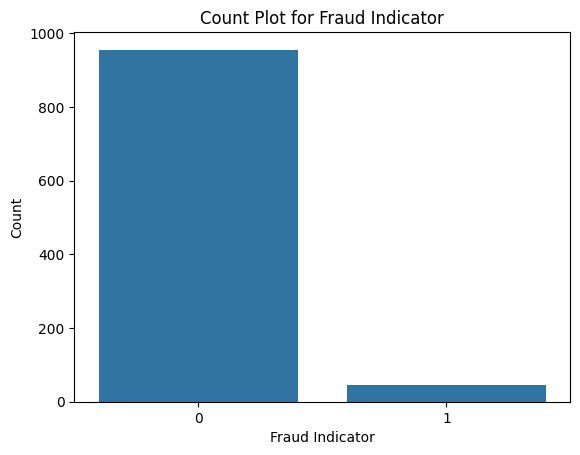

In [ ]:
# Plot distribution of FraudIndicator Flag
sns.countplot(x='FraudIndicator', data=data)
plt.title('Count Plot for Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

**Correlation Matrix**

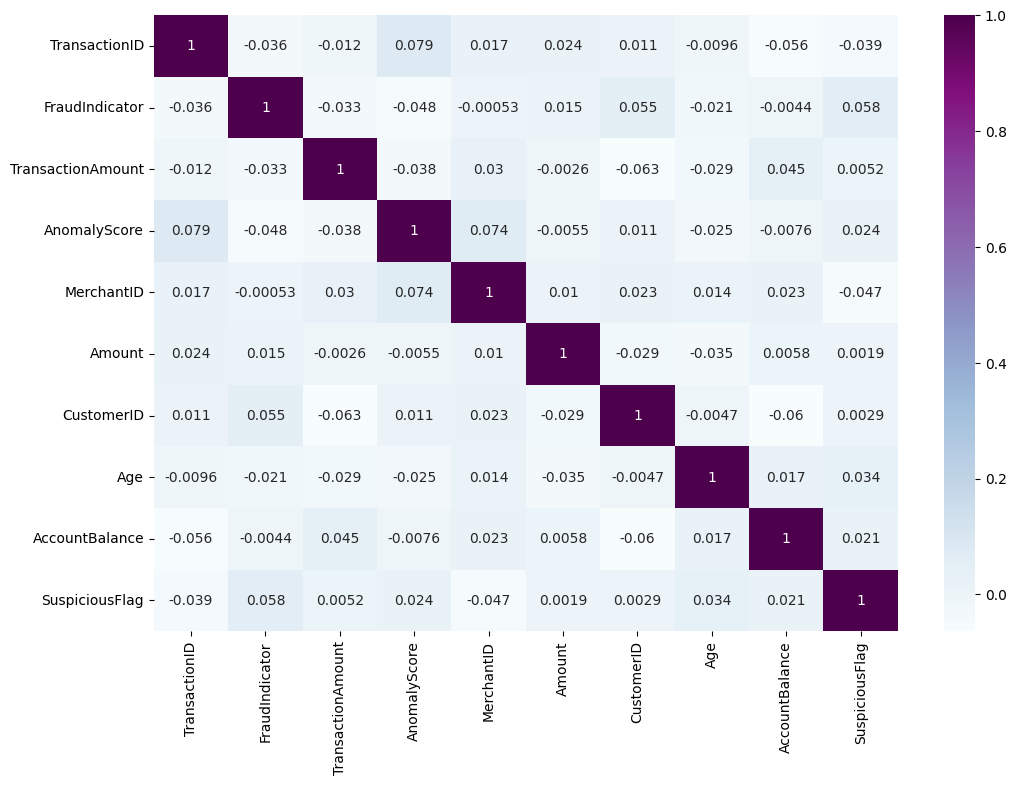

In [ ]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()


plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True, cmap="BuPu")
plt.show()



In [ ]:
#Dropping these columns since they are not highly correlated and their removal is unlikely to negatively impact the model's performance.

data1 = data.drop(['TransactionID','MerchantID','CustomerID','Name', 'Age', 'Address'], axis=1)
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0
1,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0
2,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0
3,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,41.634001,5588.049942,2024-03-06,0
4,0,Other,54.051618,0.034059,2022-01-01 04:00:00,78.122853,7324.785332,2024-08-03,0


**Convert Timestamp to datatime format**



In [ ]:
data1['Timestamp1'] = pd.to_datetime(data1['Timestamp'])
print(data1.dtypes)

FraudIndicator                int64
Category                     object
TransactionAmount           float64
AnomalyScore                float64
Timestamp                    object
Amount                      float64
AccountBalance              float64
LastLogin                    object
SuspiciousFlag                int64
Timestamp1           datetime64[ns]
dtype: object


**Convert LastLogin to datatime format**

In [ ]:
data1['LastLogin1'] = pd.to_datetime(data1['LastLogin'])


**Caculate the gap**

In [ ]:
data1['gap'] = (data1['Timestamp1'] - data1['LastLogin1']).dt.days.abs()


In [ ]:
data1.head()


,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag,Timestamp1,LastLogin1,gap
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0,2022-01-01 00:00:00,2024-08-09,951
1,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0,2022-01-01 01:00:00,2022-01-27,26
2,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0,2022-01-01 02:00:00,2024-08-12,954
3,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,41.634001,5588.049942,2024-03-06,0,2022-01-01 03:00:00,2024-03-06,795
4,0,Other,54.051618,0.034059,2022-01-01 04:00:00,78.122853,7324.785332,2024-08-03,0,2022-01-01 04:00:00,2024-08-03,945


In [ ]:
X = data1.drop(['FraudIndicator','Timestamp','Timestamp1','LastLogin','LastLogin1'],axis=1)
Y = data1['FraudIndicator']

**For handeling the categorical features**

In [ ]:
from sklearn.preprocessing import LabelEncoder
print(data1['Category'].value_counts())
print("--------------------------------")
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the 'Category' column
X['Category'] = label_encoder.fit_transform(X['Category'])
print(X['Category'].value_counts())
X

Category
Other     210
Food      204
Travel    198
Online    196
Retail    192
Name: count, dtype: int64
--------------------------------
Category
2    210
0    204
4    198
1    196
3    192
Name: count, dtype: int64


,Category,TransactionAmount,AnomalyScore,Amount,AccountBalance,SuspiciousFlag,gap
0,2,79.413607,0.686699,55.530334,2869.689912,0,951
1,1,12.053087,0.081749,12.881180,9527.947107,0,26
2,4,33.310357,0.023857,50.176322,9288.355525,0,954
3,4,46.121117,0.876994,41.634001,5588.049942,0,795
4,2,54.051618,0.034059,78.122853,7324.785332,0,945
...,...,...,...,...,...,...,...
995,0,89.457059,0.266778,19.876750,1290.323059,0,369
996,3,47.958030,0.512483,96.299792,7067.831609,0,524
997,0,64.210046,0.367740,75.164459,9088.738359,0,612
998,4,64.684167,0.960364,93.633040,9352.655675,0,886


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           1000 non-null   int64  
 1   TransactionAmount  1000 non-null   float64
 2   AnomalyScore       1000 non-null   float64
 3   Amount             1000 non-null   float64
 4   AccountBalance     1000 non-null   float64
 5   SuspiciousFlag     1000 non-null   int64  
 6   gap                1000 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


**Oversampling**

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_resampled,Y_resampled=smote.fit_resample(X,Y)
Y_resampled.value_counts()

,count
FraudIndicator,
0,955
1,955



Balanced class distribution:
FraudIndicator
0    955
1    955
Name: count, dtype: int64


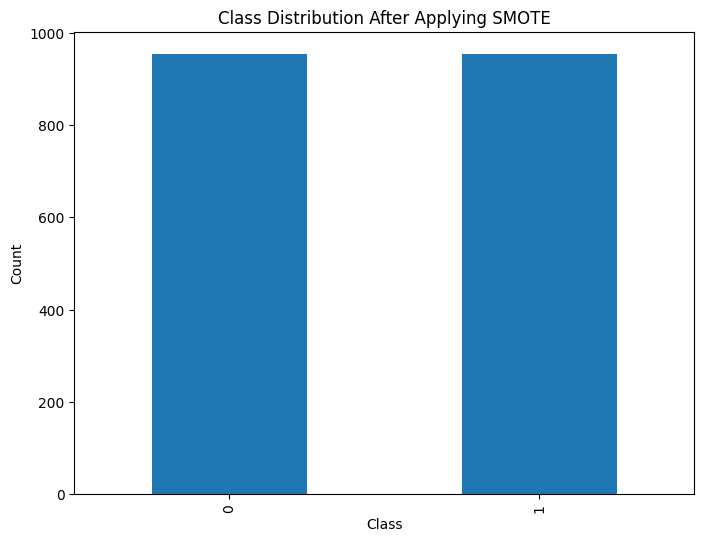

In [ ]:
# Balanced class distribution
print("\nBalanced class distribution:")
class_counts = pd.Series(Y_resampled).value_counts()
print(class_counts)
# Plotting the balanced class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title("Class Distribution After Applying SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

**Data Spiltting**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled,Y_resampled,test_size=0.2)

In [ ]:
X_train.shape,Y_test.shape

((1528, 7), (382,))

# Random Forest Algorithm

Optimal Hyperparameter Configuration: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Model Performance Summary:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       192
           1       0.87      0.97      0.92       190

    accuracy                           0.92       382
   macro avg       0.92      0.92      0.92       382
weighted avg       0.92      0.92      0.92       382



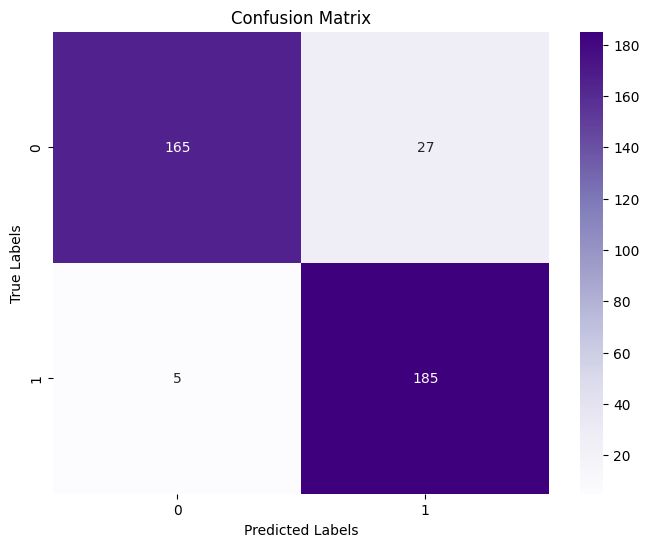

In [ ]:
# Name: Ashjan Almasabi    ID: 2129052
# Name: Deem AlOtaibi      ID: 2105441
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Set up the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

#Define the range of hyperparameters to optimize
hyperparam_options = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search_cv = GridSearchCV(
    estimator=random_forest,
    param_grid=hyperparam_options,
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Optimize for F1-score
    n_jobs=-1 , # Use all available CPU cores


)

#Train the model with hyperparameter tuning
grid_search_cv.fit(X_train, y_train)

#Get the best hyperparameters and corresponding model
optimal_hyperparams = grid_search_cv.best_params_
optimized_model = grid_search_cv.best_estimator_

# Print the chosen hyperparameters
print(f"Optimal Hyperparameter Configuration: {optimal_hyperparams}")

# Evaluate the optimized model
# Train the optimized model on the training set
optimized_model.fit(X_train, y_train)

# Predict outcomes for the testing set
predictions = optimized_model.predict(X_test)

# Generate evaluation metrics
print("\nModel Performance Summary:")
print(classification_report(y_test, predictions))

# Compute Confusion Matrix
ConfusionMatrix = confusion_matrix(y_test,predictions)
# Display Confusion Matrix Using A Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(ConfusionMatrix, annot = True, fmt = "d", cmap = "Purples", cbar = True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

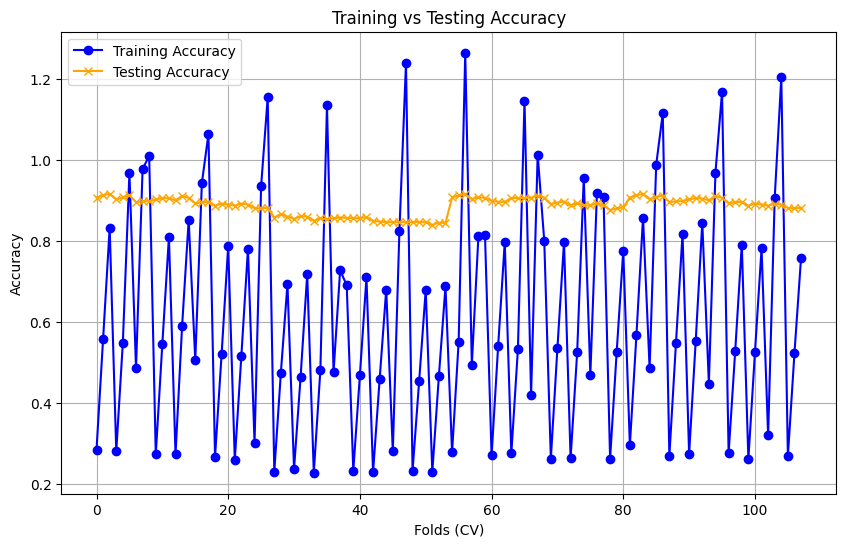

In [ ]:
# Extracting training and testing accuracy per fold during GridSearchCV
train_accuracy = grid_search_cv.cv_results_['mean_fit_time']  # Replace with actual training time or other metrics if necessary
test_accuracy = grid_search_cv.cv_results_['mean_test_score']  # Mean test accuracy from GridSearchCV

# Plotting training vs testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(test_accuracy, label='Testing Accuracy', color='orange', marker='x')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Folds (CV)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Optimal Hyperparameter Configuration: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Model Performance Summary:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       192
           1       0.87      0.97      0.92       190

    accuracy                           0.92       382
   macro avg       0.92      0.92      0.92       382
weighted avg       0.92      0.92      0.92       382



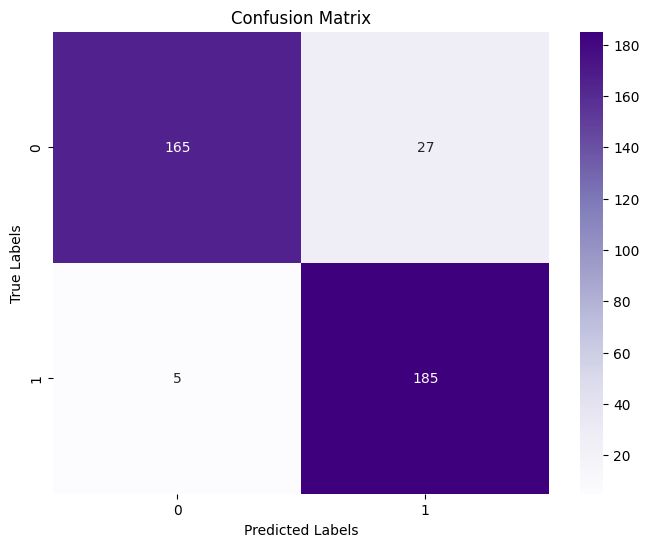

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Set up the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the range of hyperparameters to optimize
hyperparam_options = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search_cv = GridSearchCV(
    estimator=random_forest,
    param_grid=hyperparam_options,
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Optimize for F1-score
    n_jobs=-1,  # Use all available CPU cores
)

# Train the model with hyperparameter tuning
grid_search_cv.fit(X_train, y_train)

# Get the best hyperparameters and corresponding model
optimal_hyperparams = grid_search_cv.best_params_
optimized_model = grid_search_cv.best_estimator_

# Print the chosen hyperparameters
print(f"Optimal Hyperparameter Configuration: {optimal_hyperparams}")

# Evaluate the optimized model
# Train the optimized model on the training set
optimized_model.fit(X_train, y_train)

# Predict outcomes for the testing set
predictions = optimized_model.predict(X_test)

# Generate evaluation metrics
print("\nModel Performance Summary:")
print(classification_report(y_test, predictions))

# Compute Confusion Matrix
ConfusionMatrix = confusion_matrix(y_test, predictions)

# Display Confusion Matrix Using A Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


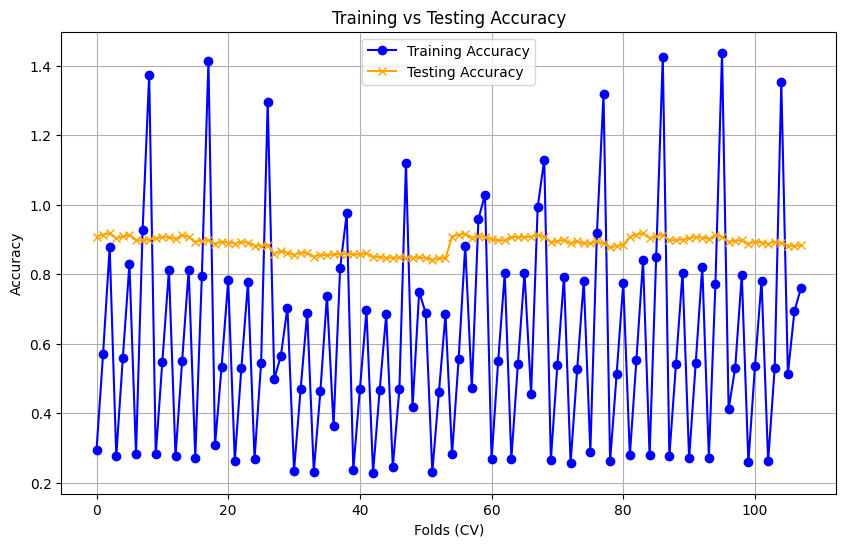

In [ ]:
# Extracting training and testing accuracy per fold during GridSearchCV
train_accuracy = grid_search_cv.cv_results_['mean_fit_time']  # Replace with actual training time or other metrics if necessary
test_accuracy = grid_search_cv.cv_results_['mean_test_score']  # Mean test accuracy from GridSearchCV

# Plotting training vs testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(test_accuracy, label='Testing Accuracy', color='orange', marker='x')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Folds (CV)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Logistic Regression

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.55      0.58       193
           1       0.58      0.63      0.61       189

    accuracy                           0.59       382
   macro avg       0.59      0.59      0.59       382
weighted avg       0.59      0.59      0.59       382



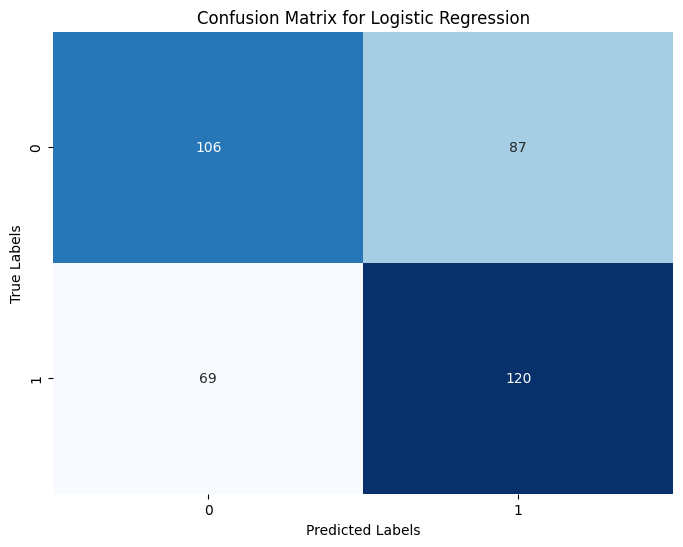

AUC-ROC Score: 0.6247


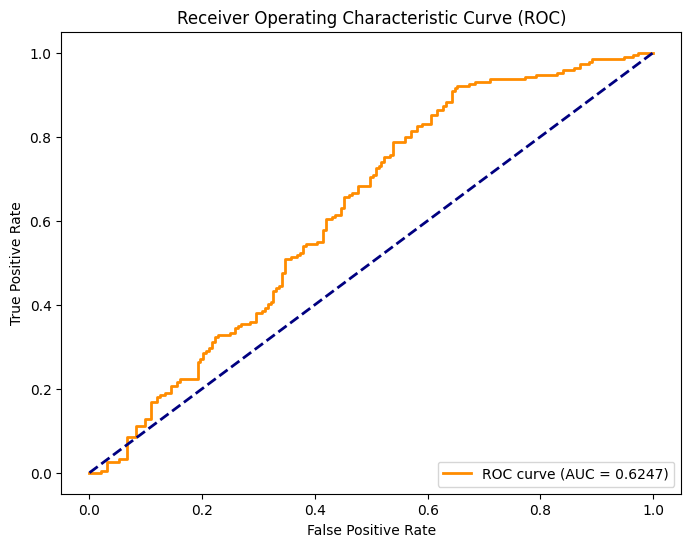

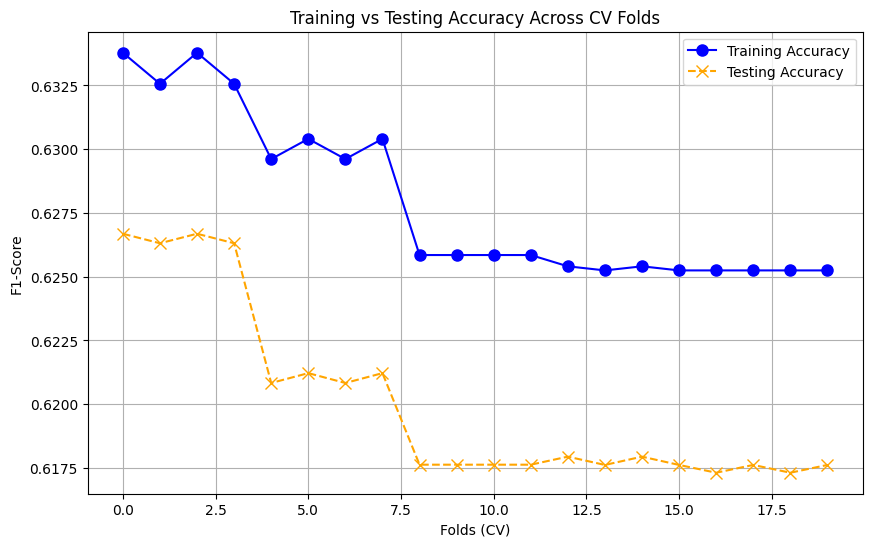

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# 2. Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Hyperparameter Grid Search for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength (inverse)
    'solver': ['lbfgs', 'liblinear'],  # Solvers for optimization
    'penalty': ['l2'],  # L2 regularization is standard for Logistic Regression
    'class_weight': ['balanced', None]  # Adjust for class imbalance
}

# 3. GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1, return_train_score=True)
grid_search.fit(X_scaled, Y_resampled)

# 4. Best model from GridSearchCV
best_log_reg = grid_search.best_estimator_

# Print the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# 5. Model Evaluation on Test Set (using the scaled test set)
X_test_scaled = scaler.transform(X_test)  # Apply the same scaling to the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Classification Report
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# AUC-ROC Curve
y_pred_prob = best_log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(Y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (ROC)')
plt.legend(loc='lower right')
plt.show()

# 6. Check Overfitting via Train vs Test Accuracy
train_accuracy = grid_search.cv_results_['mean_train_score']
test_accuracy = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', color='blue', marker='o', linestyle='-', markersize=8)
plt.plot(test_accuracy, label='Testing Accuracy', color='orange', marker='x', linestyle='--', markersize=8)
plt.title('Training vs Testing Accuracy Across CV Folds')
plt.xlabel('Folds (CV)')
plt.ylabel('F1-Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# **XGBoost**

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}

Model Performance Summary:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       204
           1       0.86      0.94      0.90       178

    accuracy                           0.90       382
   macro avg       0.90      0.90      0.90       382
weighted avg       0.90      0.90      0.90       382

AUC-ROC: 0.9795109054857899


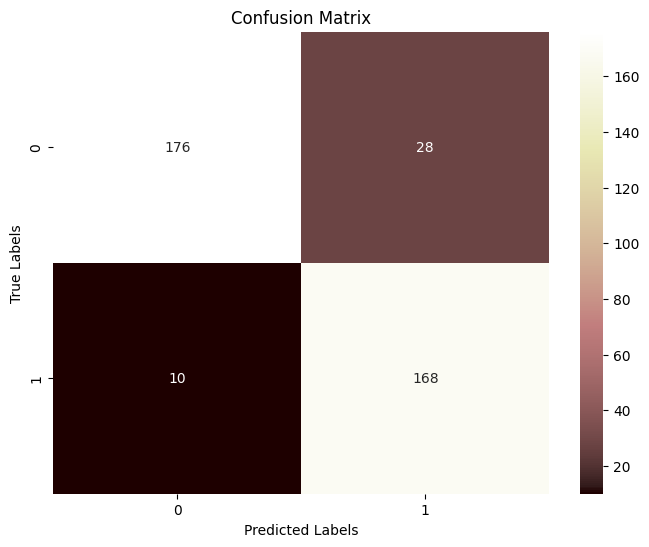

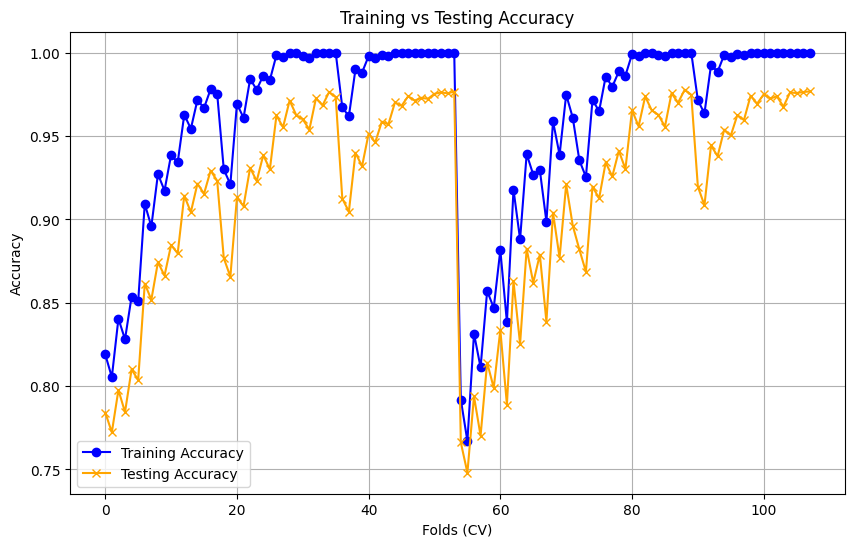

In [ ]:
#Name: Dareen Hamed Alsulami  ID:2105810
#Name: Riham Bichara          ID:2128852

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Parameter grid with additional tuning
param_grid = {
    'n_estimators': [50, 100, 150],         # Number of trees in the forest
    'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage used in updates
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize XGBoost classifier with eval_metric
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    return_train_score=True # Added to capture training scores
)

# Train model
grid_search.fit(X_train, Y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("\nModel Performance Summary:")
print(classification_report(Y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(Y_test, y_pred_prob)}")

# Confusion matrix
ConfusionMatrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="pink", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Extracting training and testing accuracy per fold during GridSearchCV
train_accuracy = grid_search.cv_results_['mean_train_score'] # Now stores mean training scores
test_accuracy = grid_search.cv_results_['mean_test_score']  # Mean test accuracy from GridSearchCV

# Plotting training vs testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(test_accuracy, label='Testing Accuracy', color='orange', marker='x')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Folds (CV)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Decision Tree Algorithm

Best Hyperparameters: {'ccp_alpha': 0.005, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 8}
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.48      0.62       192
           1       0.64      0.91      0.75       190

    accuracy                           0.70       382
   macro avg       0.74      0.70      0.68       382
weighted avg       0.74      0.70      0.68       382



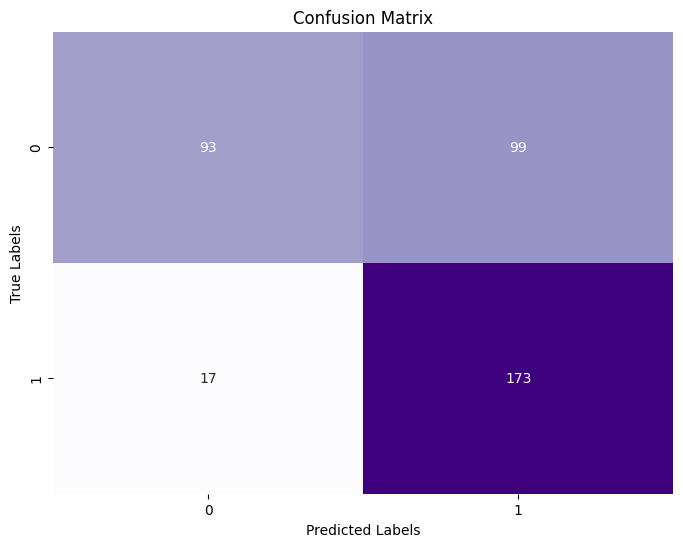

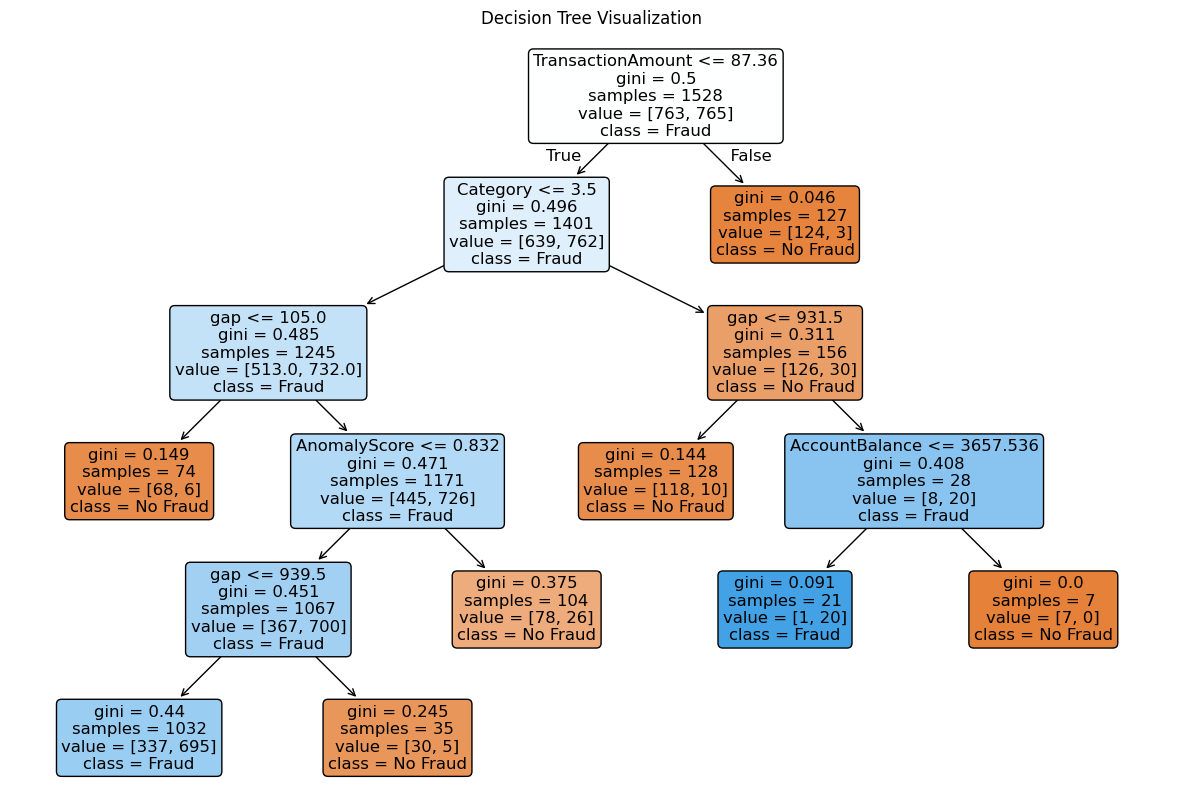

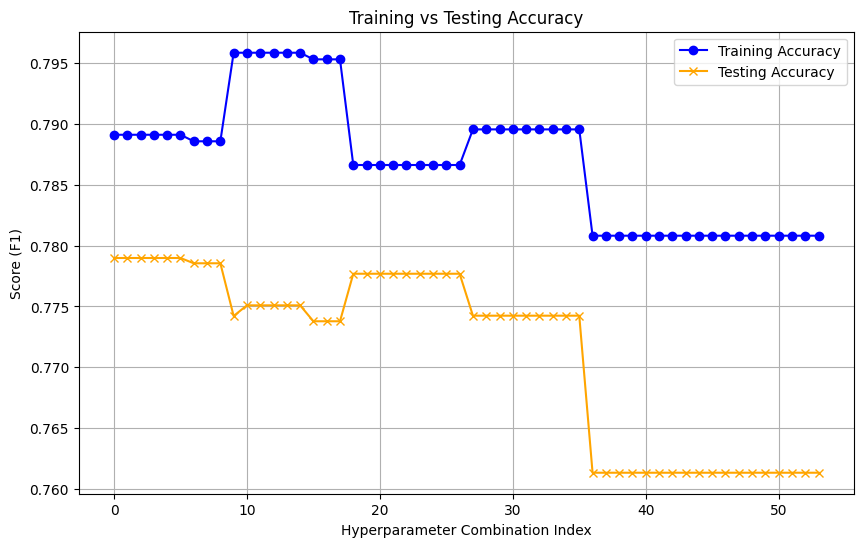

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42
)
# Initialize the DecisionTreeClassifier with pre-pruning parameters **TO PREVENT OVERFIT**
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,                # Limit depth to prevent overfitting
    min_samples_split=10,       # Minimum samples required to split a node
    min_samples_leaf=5,         # Minimum samples in a leaf node
)


# Define Hyperparameter Grid for Tuning
param_grid = {
    'max_depth': [5, 6],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [4, 5, 6],
    'ccp_alpha': [0.005, 0.0075, 0.01]
}


# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(estimator=dt_model,
                           param_grid=param_grid,
                           scoring='f1',  # Optimize for F1-score
                           cv=5,          # 5-fold cross-validation
                           n_jobs=-1,  # Use all available CPU cores
                           return_train_score=True)

# Train the Model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the Best Parameters and Model
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the Tuned Model
y_pred = best_model.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=X_train.columns, class_names=['No Fraud', 'Fraud'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


# Extract training and testing accuracy for each hyperparameter combination
train_accuracy = grid_search.cv_results_['mean_train_score']
test_accuracy = grid_search.cv_results_['mean_test_score']
param_combinations = range(len(train_accuracy))  # Unique parameter combinations

# Plot Training vs Testing Accuracy
plt.figure(figsize=(10, 6))
plt.plot(param_combinations, train_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(param_combinations, test_accuracy, label='Testing Accuracy', color='orange', marker='x')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Score (F1)')
plt.legend()
plt.grid(True)
plt.show()
